In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Export_reference__mots_clefs.xlsx")
df

,REFERENCE,TITRE,MOTCLE,Unnamed: 3,Unnamed: 4
0,SPA 82 A 2979,Chanak Kalessi. Vue de la ville. [Légende d'or...,Militaire ; Ville ; Paysage ; Transport mariti...,NaN,NaN
1,D0388-020-001-2179,(F[or]t D[auphin]). Bastion du fort Flacourt. ...,Infrastructure militaire ; Bastion ; Architect...,NaN,NaN
2,D0370-002-001-0009,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Béret ; Montre ;...,NaN,NaN
3,D0370-002-001-0010,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Béret ; Montre ;...,NaN,NaN
4,D0370-002-001-0011,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Troupes aéroport...,NaN,NaN
...,...,...,...,...,...
132114,2021_ECPAD_053_X_003_435,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Armée Allemagne...,NaN,NaN
132115,2021_ECPAD_053_X_003_438,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Croix de Lorraine,NaN,NaN
132116,2021_ECPAD_053_X_003_439,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Croix de Lorraine,NaN,NaN
132117,2021_ECPAD_053_X_003_444,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Armée Allemagne...,NaN,NaN


In [3]:
df.dtypes

REFERENCE     object
TITRE         object
MOTCLE        object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [4]:
df = df.drop(["Unnamed: 3","Unnamed: 4"], axis=1).astype("str")


In [5]:
df_mot_cle = df["MOTCLE"]

def split_word(el : str):
    return el.split(";")
df_mot_cle = df_mot_cle.apply(split_word)
df_mot_cle

0         [Militaire ,  Ville ,  Paysage ,  Transport ma...
1         [Infrastructure militaire ,  Bastion ,  Archit...
2         [Population civile ,  Soigner ,  Béret ,  Mont...
3         [Population civile ,  Soigner ,  Béret ,  Mont...
4         [Population civile ,  Soigner ,  Troupes aérop...
                                ...                        
132114    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
132115    [Musée ,  Libération ,  Drapeau ,  Croix de Lo...
132116    [Musée ,  Libération ,  Drapeau ,  Croix de Lo...
132117    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
132118    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
Name: MOTCLE, Length: 132119, dtype: object

In [6]:
import random
random.shuffle(df_mot_cle)
df_mot_cle[:100]

0     [Cassard ,  Exercice ,  Observateur ,  Jumelle...
1        [Obsèques ,  Cercueil ,  Hommage ,  Cérémonie]
2     [Désert ,  Armée étrangère ,  Démonstration , ...
3     [Opération Barkhane ,  Mirage-2000 C ,  Avion ...
4     [Hélicoptère civil ,  Raid Gauloises ,  Manife...
                            ...                        
95    [Mission "Lynx" ,  OTAN ,  S-GTIA Lynx ,  Exer...
96    [Croix-Rouge ,  Oeuvre de bienfaisance ,  Véhi...
97    [OTAN ,  Mission "Lynx" ,  S-GTIA Lynx ,  Entr...
98    [Wagon ,  Train blindé ,  Voie ferrée ,  Gare ...
99    [Commémoration ,  Flambeau ,  Militaire ,  Por...
Name: MOTCLE, Length: 100, dtype: object

Perform a One hot encoding with sklearn

In [7]:
def delete_quote(l: [str]):
    for i,s in enumerate(l):#type: str
        l[i] = s.replace('"',"").replace(" ","")
    return l
df_mot_cle = df_mot_cle.map(delete_quote)

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
df_light = df_mot_cle[:10000]
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(df_light),columns=mlb.classes_,index=df_light.index)
res

,1.Rauembootsflottille,100mm,105mm,105mmHM2A1(France),105mmHowM2A1(France),105mmM2(France),106eRI,107eRI,108eRI,10cmKanone04/14,...,Zeppelin,Zodiac,Zonederegroupementetd'attente,Zoologie,Zouave,auditeur,danslavilled'Hanoï.,nan,tournéed'inspection,Étang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
len(res)

10000

In [10]:
sum_df = res.sum().sort_values(ascending=False)
sum_df

Portrait                       1015
Soldat                          659
Arbre                           615
OpérationBarkhane               607
Populationcivile                605
                               ... 
PersonnalitéTurquie               1
PersonnalitéTchécoslovaquie       1
Douche                            1
Douglas(France)                   1
1.Rauembootsflottille             1
Length: 4248, dtype: int64

In [11]:
sum_df.apply(lambda x: x/len(res)*100)

Portrait                       10.15
Soldat                          6.59
Arbre                           6.15
OpérationBarkhane               6.07
Populationcivile                6.05
                               ...  
PersonnalitéTurquie             0.01
PersonnalitéTchécoslovaquie     0.01
Douche                          0.01
Douglas(France)                 0.01
1.Rauembootsflottille           0.01
Length: 4248, dtype: float64

In [12]:
biggest_df = sum_df[:200]
biggest_df

Portrait             1015
Soldat                659
Arbre                 615
OpérationBarkhane     607
Populationcivile      605
                     ... 
Sacàdos                86
Personnelcivil         86
Plangénéral            86
Ane                    85
Caméraman              85
Length: 200, dtype: int64

In [13]:
res_biggest = res[biggest_df.index]

In [14]:
corr = res_biggest.corr()

In [15]:
corr = corr.round(4)

<AxesSubplot:>

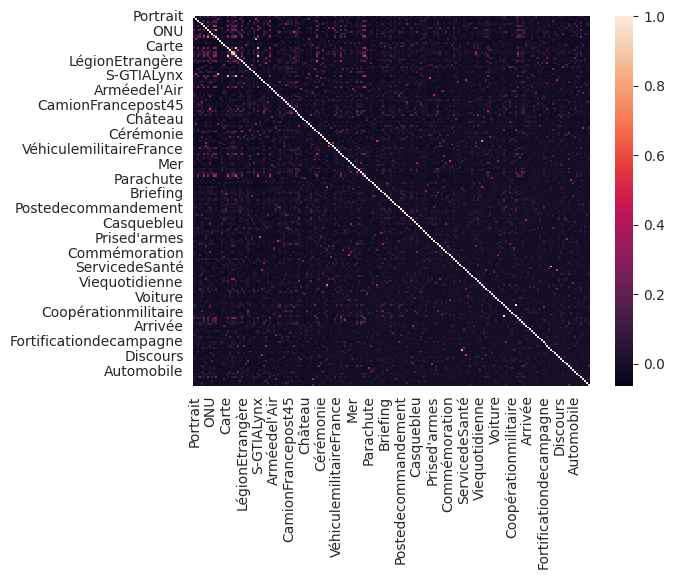

In [16]:
import seaborn  as sns
sns.heatmap(corr)

In [40]:
dict_cor = corr.to_dict()
for el in dict_cor: #type:dict
    dict_cor[el] = {k: v for k,v in dict_cor[el].items() if ( dict_cor[el][k] > 0.5 or dict_cor[el][k] < -0.6)and el != k}

In [41]:
dict_cor

{'Portrait': {},
 'Soldat': {'Tombe': 0.5141},
 'Arbre': {},
 'OpérationBarkhane': {},
 'Populationcivile': {},
 'Exercice': {'Entraînement': 0.5322},
 'Cérémoniemilitaire': {},
 'Casque': {'Giletpare-balles': 0.6972},
 'ONU': {'FMSB': 0.6025},
 'Désert': {},
 'Entraînement': {'Exercice': 0.5322, 'Terraindemanoeuvres': 0.5277},
 'Giletpare-balles': {'Casque': 0.6972},
 'Cimetière': {'Tombe': 0.7917},
 'Cheval': {},
 'Campmilitaire': {},
 'Visite': {},
 'Carte': {},
 'OTAN': {'MissionLynx': 0.9188,
  'S-GTIALynx': 0.8511,
  'Terraindemanoeuvres': 0.5562},
 'Ville': {},
 'FAMAS': {'FusilFrancepost45': 0.7895},
 'FusilFrancepost45': {'FAMAS': 0.7895},
 'MissionLynx': {'OTAN': 0.9188,
  'S-GTIALynx': 0.8807,
  'Terraindemanoeuvres': 0.5791},
 'Immeuble': {},
 'ArméedeTerre': {},
 'LégionEtrangère': {'Légionnaire': 0.6072},
 'Ruine': {'Destruction': 0.5174},
 'MinistredelaDéfense': {},
 'Portraitdegroupe': {},
 'Paysage': {},
 'Remisededécoration': {},
 'Patrouille': {},
 'Tombe': {'Soldat'

In [51]:
import graphviz as gz

def get_color(w: float):
    color=["green","blue","orange","red","black"]
    return color[int((w*len(color)))]

def dict_to_graph(d_in) -> gz.Graph:
	gra = gz.Graph(strict=True)
	for k, d in d_in.items():
		for k2, v in d.items():
			gra.edge(k, k2, label=str(v),color=get_color(v))
	return gra
g = dict_to_graph(dict_cor)

In [52]:
g.render("test",format="png")

'test.png'

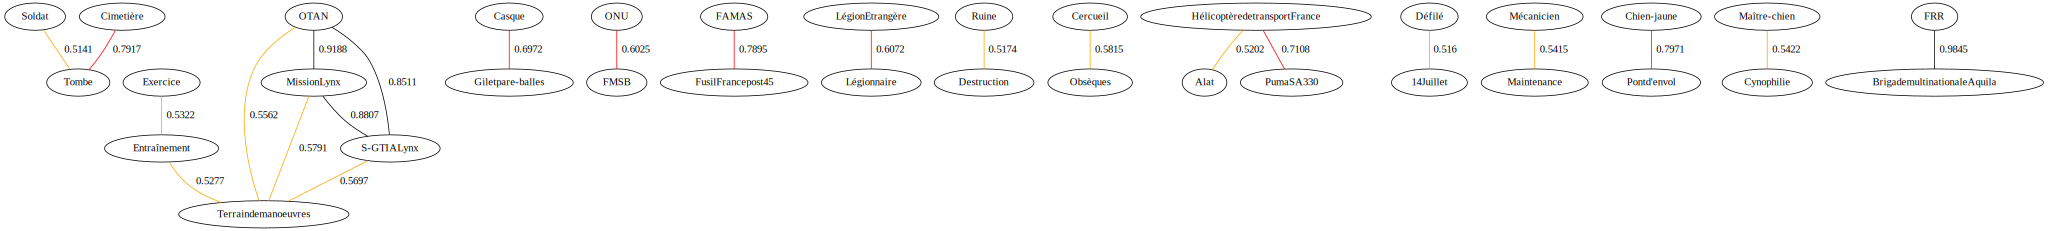

In [53]:
g